In [1]:
img_folder = r'../data/UTKFace_Dataset/'
img_name= '81_1_0_20170120134927295.jpg.chip.jpg'
img_path = f'{img_folder}/{img_name}'

# Args

In [81]:
gpu_gb_limit = 6

In [2]:
!ls

age.ipynb  detection.ipynb  EDA.ipynb


# Deepface

## Limit inference GPU

In [ ]:
import tf_mem

In [ ]:
tf_mem.limit_gpu_gb(gpu_gb_limit)

In [4]:
retincaface_rep_path = r'../deepface/'

In [5]:
import os

In [6]:
import sys
from pathlib import Path

# Get the absolute path of the RetinaFace-tf2 directory
retinaface_tf2_path = Path(retincaface_rep_path).resolve()

# Add the directory to sys.path
sys.path.append(str(retinaface_tf2_path))

In [7]:
abs_img_folder = r'/home/arm16/0_git/private/face_p_age_detection//data/UTKFace_Dataset/'

from pathlib import Path

data_folder = Path(img_folder)

filenames = list(map(lambda x: x.name, 
		     data_folder.glob('*.jpg')))
print(len(filenames))

In [10]:
from glob import glob
filenames = sorted(glob(f'{abs_img_folder}/*.jpg'))
print(len(filenames))

23697


In [11]:
filenames[-1]

'/home/arm16/0_git/private/face_p_age_detection//data/UTKFace_Dataset/9_1_4_20170103213057382.jpg.chip.jpg'

In [12]:
from deepface import DeepFace

dfs = DeepFace.find(img_path =img_path)

In [21]:
img_path_full = r'/home/arm16/0_git/private/face_p_age_detection//data/UTKFace_Dataset//81_1_0_20170120134927295.jpg.chip.jpg'

In [14]:
img_path_full  = filenames[-1]
img_path_full

'/home/arm16/0_git/private/face_p_age_detection//data/UTKFace_Dataset/9_1_4_20170103213057382.jpg.chip.jpg'

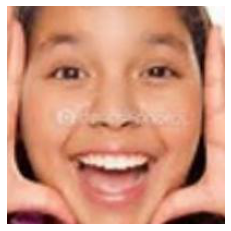

In [15]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(img_path_full)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off the axis ticks and labels
plt.show()

In [16]:
os.path.exists(img_path_full)

True

In [24]:
image_rgb.shape[:2]

(200, 200)

In [25]:
typical_dataset_im_size = (200, 200)

# Stat backends

In [ ]:
backends = [
  #'opencv', 
  'ssd',   
  'mtcnn',
  'dlib',  # need to be installed separatly # ython3.8/site-packages/requests/structures.py in __getitem__(self, key) # def __getitem__(self, key): ---> 52 return self._store[key.lower()][1] 53 54 def __delitem__(self, key): KeyError: 'content-type'
  'retinaface',  # need to be installed separatly
  'mediapipe', # pip need to be installed separatly # https://developers.google.com/mediapipe/framework/getting_started/install#installing_on_debian_and_ubuntu
  'yolov8', # ultra... and pytorch proper need to be installed separatly
  'yunet', 
]

How much will detect backend if 100%?

## 'mtcnn'

In [30]:
def plot_pred(face_obj):
    
    n_face = len(face_obj)
    detected_face = face_obj[n_face-1]["face"]
    plt.imshow(detected_face[:, :, ::-1])

In [37]:
from tqdm import tqdm

In [78]:
backends_selected = ['mediapipe']
backend = backends_selected[0]

pathes = []
confs = []

#for backend in backends_selected:
for img_path_full in tqdm(filenames):
    #try:
    #print(backend)
    try:
        face_obj = DeepFace.extract_faces(img_path_full, #img_path, 
                                          detector_backend = backend,
                                          grayscale = False,
                                          align = False,
                                          enforce_detection=True,
                                          target_size=typical_dataset_im_size)

        n_face = len(face_obj)

        #n_face_arr.append(n_face)
    except:
        face_obj = DeepFace.extract_faces(img_path_full, #img_path, 
                                          detector_backend = backend,
                                          grayscale = False,
                                          align = False,
                                          enforce_detection=False,
                                          target_size=typical_dataset_im_size)

        
        pathes.append(img_path_full)
        confs.append(face_obj[0]['confidence'])
    
    #print(f'{n_face} found')
    #plot_pred(face_obj)
    
    #break

  0%|                                                 | 0/23697 [00:00<?, ?it/s]


ModuleNotFoundError: No module named 'mediapipe'

In [76]:
import torch

torch.__version__

'1.13.1'

In [77]:
import torchvision

torchvision.__version__

'0.13.1a0'

## YuNet

In [62]:
backend= 'mediapipe' # error: OpenCV(4.6.0) /croot/opencv-suite_1676452025216/work/modules/dnn/src/layers/eltwise_layer.cpp:251: error: (-215:Assertion failed) inputs[vecIdx][j] == inputs[i][j] in function 'getMemoryShapes'

img_path_full = '/home/arm16/0_git/private/face_p_age_detection//data/UTKFace_Dataset/100_1_0_20170112213021902.jpg.chip.jpg'

In [63]:
face_obj = DeepFace.extract_faces(img_path_full, #img_path, 
                                  detector_backend = backend,
                                  grayscale = False,
                                  align = False,
                                  enforce_detection=True,
                                  target_size=typical_dataset_im_size)

ModuleNotFoundError: No module named 'mediapipe'

In [ ]:
backends = [
  #'opencv', 
  'ssd',   
  'mtcnn',
   #'dlib',  # CONDA need to be installed separatly
  'retinaface',  # CONDA need to be installed separatly
  'mediapipe', # need to be installed separatly
  'yolov8', # need to be installed separatly
  'yunet', 
]

In [65]:
len(confs)

23048

In [54]:
pathes

['/home/arm16/0_git/private/face_p_age_detection//data/UTKFace_Dataset/100_1_0_20170112213021902.jpg.chip.jpg',
 '/home/arm16/0_git/private/face_p_age_detection//data/UTKFace_Dataset/100_1_1_20170112213303693.jpg.chip.jpg',
 '/home/arm16/0_git/private/face_p_age_detection//data/UTKFace_Dataset/12_0_0_20170110215606404.jpg.chip.jpg',
 '/home/arm16/0_git/private/face_p_age_detection//data/UTKFace_Dataset/12_0_0_20170110232735095.jpg.chip.jpg',
 '/home/arm16/0_git/private/face_p_age_detection//data/UTKFace_Dataset/12_1_0_20170109204428993.jpg.chip.jpg',
 '/home/arm16/0_git/private/face_p_age_detection//data/UTKFace_Dataset/14_1_0_20170109203340834.jpg.chip.jpg',
 '/home/arm16/0_git/private/face_p_age_detection//data/UTKFace_Dataset/15_0_0_20170116201332456.jpg.chip.jpg',
 '/home/arm16/0_git/private/face_p_age_detection//data/UTKFace_Dataset/18_0_1_20170113175821404.jpg.chip.jpg',
 '/home/arm16/0_git/private/face_p_age_detection//data/UTKFace_Dataset/18_1_0_20170109212908376.jpg.chip.jpg',

In [13]:
pathes2 = [os.path.basename(el) for el in pathes]
pathes2

['100_1_0_20170112213021902.jpg.chip.jpg',
 '100_1_1_20170112213303693.jpg.chip.jpg',
 '12_0_0_20170110215606404.jpg.chip.jpg',
 '12_0_0_20170110232735095.jpg.chip.jpg',
 '12_1_0_20170109204428993.jpg.chip.jpg',
 '14_1_0_20170109203340834.jpg.chip.jpg',
 '15_0_0_20170116201332456.jpg.chip.jpg',
 '18_0_1_20170113175821404.jpg.chip.jpg',
 '18_1_0_20170109212908376.jpg.chip.jpg',
 '18_1_0_20170109213103958.jpg.chip.jpg',
 '1_0_0_20161219154956869.jpg.chip.jpg',
 '1_0_0_20161219161028662.jpg.chip.jpg',
 '1_0_0_20161219192208688.jpg.chip.jpg',
 '1_0_0_20161219192713491.jpg.chip.jpg',
 '1_0_0_20161219195753899.jpg.chip.jpg',
 '1_0_0_20170109192819417.jpg.chip.jpg',
 '1_0_0_20170109193647852.jpg.chip.jpg',
 '1_0_0_20170110211536519.jpg.chip.jpg',
 '1_0_0_20170110212652648.jpg.chip.jpg',
 '1_0_0_20170110212720644.jpg.chip.jpg',
 '1_0_0_20170110212745529.jpg.chip.jpg',
 '1_0_0_20170110213206043.jpg.chip.jpg',
 '1_0_2_20161219140811232.jpg.chip.jpg',
 '1_0_2_20161219142039985.jpg.chip.jpg',
 '1_

In [79]:
import yaml 

non_detect_path = 'retinaface_no_detect.yaml'

with open(non_detect_path, 'w') as file:
    yaml.dump(pathes, file)

In [66]:
1-len(confs)/len(filenames)

0.027387433008397633

In [45]:
face_obj = DeepFace.extract_faces(img_path_full, #img_path, 
                                      detector_backend = backend,
                                      grayscale = False,
                                      align = False,
                                      enforce_detection=False,
                                      target_size=typical_dataset_im_size)

In [47]:
face_obj[0]['confidence']

0

In [84]:
7

7

In [42]:
face_obj

[{'face': array([[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         ...,
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],

In [33]:
import numpy as np
n_face_arr = np.array(n_face_arr)

### If more than 1 face

In [39]:
ind_selector = n_face_arr!=1
multiples_val = n_face_arr[ind_selector]

exscesive_faces = multiples_val-1
exscesive_faces

array([1, 1, 1, 1, 1, 1, 1, 1])

In [59]:
len(exscesive_faces)

8

### Amount of faces

In [35]:
sum(n_face_arr)

23705

In [40]:
percent_found = (sum(n_face_arr)-sum(exscesive_faces))/len(n_face_arr)
percent_found

1.0

In [41]:
non_found_ind_selector = n_face_arr==0
#non_val = n_face_arr[ind_selector]
sum(non_found_ind_selector)

0

In [38]:
# Started 20:50

from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 20:42:37


In [28]:
!nvidia-smi

/bin/bash: /home/arm16/mambaforge/envs/face_detection_age/lib/python3.8/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
Tue Aug  1 19:34:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 470.63.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
|  0%   50C    P2    61W / 250W |   7533MiB /  7981MiB |      1%      Default |
|                               |                      |              

In [46]:
len(face_obj)

1

In [49]:
detected_face = face_obj[len(face_obj)-1]["face"]
# denormalize image
detected_face = detected_face# * 255

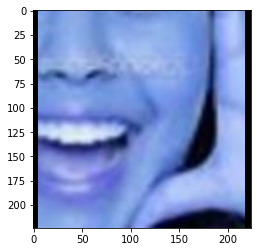

In [50]:
plt.imshow(detected_face)

In [39]:
image_rgb.shape

(200, 200, 3)

In [13]:
objs = DeepFace.analyze(img_path = img_path, 
        actions = ['age']
)
objs

ValueError: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.

In [11]:
import cv2

In [3]:
retincaface_rep_path = r'../RetinaFace-tf2/'

In [4]:
import os

In [5]:
import sys
from pathlib import Path

# Get the absolute path of the RetinaFace-tf2 directory
retinaface_tf2_path = Path(retincaface_rep_path).resolve()

# Add the directory to sys.path
sys.path.append(str(retinaface_tf2_path))

In [10]:
!pip install wget

/bin/bash: /home/arm16/mambaforge/envs/face_detection_age/lib/python3.8/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [6]:
os.chdir(retincaface_rep_path)

In [9]:
os.path.exists('./data/retinafaceweights.npy')

True

In [10]:
import tensorflow

tensorflow.__version__

'2.2.0'

In [7]:
from src.retinafacetf2.retinaface import RetinaFace
import cv2

detector = RetinaFace(False, 
                      0.4)
img = cv2.imread(img_path)
faces, landmarks = detector.detect(img, 0.9)

OSError: Failed to interpret file './data/retinafaceweights.npy' as a pickle

In [10]:
weight_file = r'./data/retinafaceweights.npy'

In [16]:
weights_dict = np.load(weight_file, allow_pickle=True).item()

UnpicklingError: Failed to interpret file './data/retinafaceweights.npy' as a pickle

In [15]:
data_dict = np.load(weight_file, encoding='latin1', allow_pickle=True).item() 

UnpicklingError: Failed to interpret file './data/retinafaceweights.npy' as a pickle

In [1]:
import numpy as np

np.__version__

'1.22.3'

In [12]:
!ls

data		   LICENSE    requirements.txt		 src
detect.py	   Makefile   retinaface_tf2_output.jpg  WiderFace-Evaluation
eval_widerface.py  ReadMe.md  sample-images


In [4]:
%pip install wget

/bin/bash: /home/arm16/mambaforge/envs/face_detection_age/lib/python3.8/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Using cached wget-3.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [1]:
!ls

age.ipynb  detection.ipynb  EDA.ipynb


# R

In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [4]:
from retinaface import RetinaFace
#Face Detection - Demo
#RetinaFace offers a face detection function. It expects an exact path of an image as input.



In [6]:
resp = RetinaFace.detect_faces(img_path)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [7]:
resp

(array([], shape=(0, 5), dtype=float64),
 array([], shape=(0, 5, 2), dtype=float64))

In [5]:
!nvidia-smi

/bin/bash: /home/arm16/mambaforge/envs/face_detection_age/lib/python3.8/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
Tue Aug  1 13:45:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 470.63.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
|  0%   46C    P8    27W / 250W |   7958MiB /  7981MiB |      5%      Default |
|                               |                      |              